# Default Setup

In [0]:
# Dataloading Stuff
from google.colab import drive
from sys import path
import os
from importlib import reload

# Standard Stuff
!pip3 install numpy sklearn iterative-stratification pandas pyss3
from sklearn.model_selection import train_test_split

from pyss3 import SS3
from pyss3.util import Dataset, Evaluation, span

import numpy as np
import pandas as pd

!pip3 install nltk
from nltk import word_tokenize, sent_tokenize, download
download('punkt')

drive.mount('/content/drive', force_remount=True)
path_root = '/content/drive/My Drive/NLP Lab/SingleLabel/'
path.append(path_root)
data_root = 'data/'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Mounted at /content/drive


In [0]:
import util

## Classifier with 5 Classes

Classification: 100%|██████████| 630/630 [00:00<00:00, 54800.21it/s]



              precision    recall  f1-score   support

           1       0.32      0.41      0.36        29
           2       0.18      0.30      0.23        23
           3       0.26      0.21      0.23        33
           4       0.18      0.41      0.25        68
           5       0.87      0.68      0.77       477

    accuracy                           0.60       630
   macro avg       0.36      0.41      0.37       630
weighted avg       0.72      0.60      0.65       630


 Accuracy: 0.603

[ updating evaluations cache ]


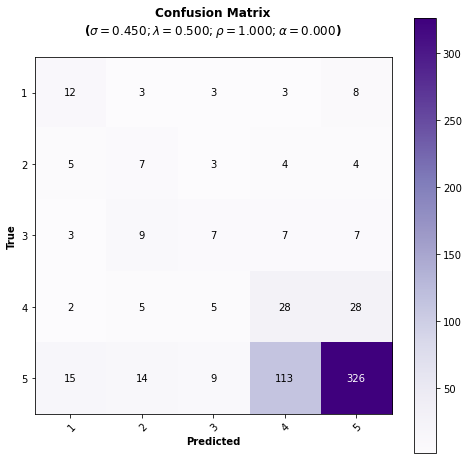

0.3689315586907208

In [0]:
df = pd.read_csv(path_root + data_root + "AmazonAlexaReview/amazon_alexa.tsv", sep="\t")
text = df['verified_reviews'].to_list()
labels = df['rating'].astype(str).to_list()

X_train, X_val, y_train, y_val = train_test_split(text, labels, test_size=0.2)
clf5 = SS3()
clf5.fit(X_train, y_train)
Evaluation.test(clf5, X_val, y_val, metric="f1-score")

## Classifier with 2 Classes

Classification: 100%|██████████| 630/630 [00:00<00:00, 51484.91it/s]



              precision    recall  f1-score   support

    negative       0.49      0.78      0.60        85
    positive       0.96      0.87      0.92       545

    accuracy                           0.86       630
   macro avg       0.73      0.82      0.76       630
weighted avg       0.90      0.86      0.87       630


 Accuracy: 0.860

[ updating evaluations cache ]


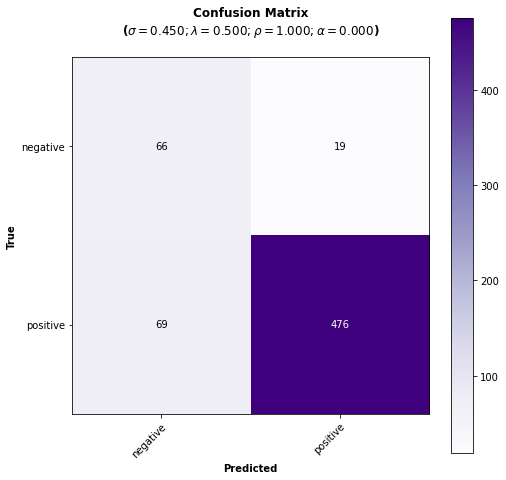

0.7576923076923077

In [0]:
y_train_two = pd.Series(y_train).astype(str).replace(to_replace={'1': 'negative', '2': 'negative', '3': 'negative', '4': 'positive', '5': 'positive'}, regex=True).to_list()
y_val_two = pd.Series(y_val).astype(str).replace(to_replace={'1': 'negative', '2': 'negative', '3': 'negative', '4': 'positive', '5': 'positive'}, regex=True).to_list()

clf2 = SS3()
clf2.fit(X_train, y_train_two)
Evaluation.clear_cache()
Evaluation.test(clf2, X_val, y_val_two, metric="f1-score")

## All Metrics (based on Utils) for 5 classes

In [0]:
!rm -rf vocab_five && mkdir vocab_five
util = reload(util)
print("Avg Number of Words", util.avg_sample_size(X_train, y_train, '1'))
print("Avg Number of Sentences", util.avg_sent_number(X_train, y_train, '1'))
print("Avg Number of Paragraphs", util.avg_para_number(X_train, y_train, '1'))
overlap, counter, ratio = util.calc_overlap(clf5, './vocab_five', 'fr')
print("Overlap Ratio All Words", ratio)

!rm -rf vocab_five && mkdir vocab_five
overlap, counter, ratio = util.calc_overlap(clf5, './vocab_five', 'cv', True, 0.000001)
print("Overlap Ratio Important Words", ratio)

Avg Number of Words 2.171031746031746
Avg Number of Sentences 0.14404761904761904
Avg Number of Paragraphs 0.05238095238095238
Overlap Ratio All Words 0.3989071038251366
Overlap Ratio Important Words 0.3989071038251366


## All Metrics (based on Utils) for 2 classes

In [0]:
!rm -rf vocab_two && mkdir vocab_two
util = reload(util)
print("Avg Number of Words", util.avg_sample_size(X_train, y_train_two, 'positive'))
print("Avg Number of Sentences", util.avg_sent_number(X_train, y_train_two, 'positive'))
print("Avg Number of Paragrahs", util.avg_para_number(X_train, y_train_two, 'positive'))
overlap, counter, ratio = util.calc_overlap(clf2, './vocab_two', 'fr')
print("Overlap Ratio", ratio)

!rm -rf vocab_two && mkdir vocab_two
overlap, counter, ratio = util.calc_overlap(clf2, './vocab_two', 'cv', True, 0.0000001)
print("Overlap Ratio Important Words", ratio)

Avg Number of Words 23.32857142857143
Avg Number of Sentences 1.9492063492063492
Avg Number of Paragrahs 0.8714285714285714
Overlap Ratio 0.31928606841844326
Overlap Ratio Important Words 0.2994546355974219
